## IBM Data Science Capstone

### Final Report: Opening a Bubble Tea Shop In Singapore

For a new entrant that wants to open a store in Singapore, we want to locate the areas where competition is less stiff. I will be using K-Means, an unsupervised learning clustering algorithm to cluster the shops island wide and see if we can find any patterns among to determine the suitability of the area.


### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

### Import csv file into a dataframe

Download the planning area and statistics of total no. of households living in each area from the govt website into a dataframe

In [2]:
df = pd.read_csv('Singapore Residents Planning Area 2019.csv', header=0)
df

,Planning Area,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Ang Mo Kio,178760,178890,178700,178260,174770,170940,166820,165710,163950
1,Bedok,295380,295220,294080,293110,289750,287170,284930,281300,279380
2,Bishan,90810,92710,92790,91920,90700,90090,90280,88490,88010
3,Boon Lay,30,30,30,30,30,30,50,30,40
4,Bukit Batok,143380,142620,142310,141560,139270,138040,138290,144410,153740
5,Bukit Merah,156370,157170,156060,156740,155840,154480,152790,151870,151980
6,Bukit Panjang,129400,130960,131490,133020,139030,141380,141930,140820,139280
7,Bukit Timah,70420,71910,73130,73810,74470,75640,76380,77280,77430
8,Central Water Catchment,10,10,10,10,10,-,-,-,-
9,Changi,2420,2470,2540,2530,2530,2450,2220,2080,1830


In [3]:
# Clean the dataset and replace empty population cell values with 0 
df = df.replace(to_replace = '-', value = 0) 
df

,Planning Area,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Ang Mo Kio,178760,178890,178700,178260,174770,170940,166820,165710,163950
1,Bedok,295380,295220,294080,293110,289750,287170,284930,281300,279380
2,Bishan,90810,92710,92790,91920,90700,90090,90280,88490,88010
3,Boon Lay,30,30,30,30,30,30,50,30,40
4,Bukit Batok,143380,142620,142310,141560,139270,138040,138290,144410,153740
5,Bukit Merah,156370,157170,156060,156740,155840,154480,152790,151870,151980
6,Bukit Panjang,129400,130960,131490,133020,139030,141380,141930,140820,139280
7,Bukit Timah,70420,71910,73130,73810,74470,75640,76380,77280,77430
8,Central Water Catchment,10,10,10,10,10,0,0,0,0
9,Changi,2420,2470,2540,2530,2530,2450,2220,2080,1830


In [4]:
# check the data type
df.dtypes

Planning Area    object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
dtype: object

In [5]:
# change to string for planning area and integer for the years
df['Planning Area'] = df['Planning Area'].astype(str)
df.loc[:,'2011':'2019']= df.loc[:,'2011':'2019'].astype(int)

### 2. Data Cleaning 

We only need the latest 2019 total number of household residential figures for each planning area. 

Note that for some planning areas the number of households reported a low figure, we will not be dropping those rows because there are people staying in those areas but less populated. We will be using an estimate from the region to assign it a figure.

In [6]:
df = df[['Planning Area', '2019']]
df = df.rename(columns={'2019':'Population'})
df

,Planning Area,Population
0,Ang Mo Kio,163950
1,Bedok,279380
2,Bishan,88010
3,Boon Lay,40
4,Bukit Batok,153740
5,Bukit Merah,151980
6,Bukit Panjang,139280
7,Bukit Timah,77430
8,Central Water Catchment,0
9,Changi,1830


In [7]:
# Rename these columns to make it more accurate for the geolocation api to find the coordinates later
df.at[24,'Planning Area']='National Museum'

# Drop Straits View and Marina South as it is in the vicinity of Downtown Core
df.drop([22, 44], axis=0, inplace=True)
df.at[13,'Planning Area']='Downtown'

# Merge Paya Lebar and Geylang together as they are in the same area
df.drop([14], axis=0, inplace=True)
df.at[31,'Population']='110240'

# Merge Newton and Orchard as they are nearby each other
df.drop([25], axis=0, inplace=True)
df.at[28,'Population']='8950'

# Merge Boon Lay, Pioneer and Jurong West as they are nearby each other
df.drop([3, 32], axis=0, inplace=True)
df.at[17,'Population']='264980'

# Drop Central Water Catchment, Marina East, North Eastern Island, Simpang, Tengah, Western island as these area are mostly non residential lands
df.drop([8,21,26,41,48,51], axis=0, inplace=True)

# Drop Changi Bay as Changi is within the same area        
df.drop([10], axis=0, inplace=True)       
df.reset_index(drop=True, inplace=True)
df

,Planning Area,Population
0,Ang Mo Kio,163950
1,Bedok,279380
2,Bishan,88010
3,Bukit Batok,153740
4,Bukit Merah,151980
5,Bukit Panjang,139280
6,Bukit Timah,77430
7,Changi,1830
8,Choa Chu Kang,190890
9,Clementi,92420


### 2.1 Connect to OpenCage Geocoder API 

Get the latitudes and longitudes for each planning area

In [8]:
#!pip install opencage

from opencage.geocoder import OpenCageGeocode
from opencage.geocoder import RateLimitExceededError

area = df['Planning Area']
result =[]
lat =[]
lng =[]
country =[]
key = '8e824a4b05e643b7bb759beec04a82ca'
geocoder = OpenCageGeocode(key)

try:
    for coord in area:
        query = coord + ', Singapore'
        result = geocoder.geocode(query)
    
        lat_r = result[0]['geometry']['lat']
        lng_r = result[0]['geometry']['lng'] 
        country_r = result[0]['components']['country']

        lat.append(lat_r) 
        lng.append(lng_r)
        country.append(country_r)

except RateLimitExceededError as ex:
  print(ex)

In [9]:
# create the dataframe
SG_df = pd.DataFrame()
SG_df['Planning Area'] = df['Planning Area']
SG_df['Country'] = country
SG_df['Latitude'] = lat
SG_df['Longitude']= lng

SG_df 

,Planning Area,Country,Latitude,Longitude
0,Ang Mo Kio,Singapore,1.369842,103.846609
1,Bedok,Singapore,1.323976,103.930216
2,Bishan,Singapore,1.351452,103.848250
3,Bukit Batok,Singapore,1.349057,103.749591
4,Bukit Merah,Singapore,1.280628,103.830591
5,Bukit Panjang,Singapore,1.377921,103.771866
6,Bukit Timah,Singapore,1.354690,103.776372
7,Changi,Singapore,1.352516,103.987007
8,Choa Chu Kang,Singapore,1.389260,103.743728
9,Clementi,Singapore,1.314026,103.762410


As the planning areas covers a large area, the coordinates retrieved may not coincide accurately. The first round of plotting the planning areas on the folium map has been done, from there we can visually inspect if the right coordinates are retrieved correctly. Check through the coordinates and update the rows accordingly.

In [10]:
# Get a better coordinate estimate for Bukit Timah
results = geocoder.geocode('Bukit Timah, Sixth Avenue, Singapore')
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng'] 
print(lat, lng)

# Southern Islands- Sentosa , Kusu Island , Lazarus Island, Saint John Island
# use Harbourfront
results = geocoder.geocode('Harbourfront, Singapore')
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng'] 
print(lat, lng)

# Paya Lebar
results = geocoder.geocode('Paya Lebar MRT, Singapore')
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng'] 
print(lat, lng)

# North-Eastern Island
results = geocoder.geocode('Pulau Ubin, Pulau Tekong , Singapore')
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng'] 
print(lat, lng)

# Bukit Merah
results = geocoder.geocode('Bukit Merah Central, Singapore')
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng'] 
print(lat, lng)

# National Musuem
results = geocoder.geocode('National Gallery, Singapore')
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng'] 
print(lat, lng)

# update the dataframe with the new coordinates
SG_df.loc[4]= ['Bukit Merah','Singapore', 1.2828133, 103.816743]
SG_df.loc[6]= ['Bukit Timah','Singapore', 1.3317384, 103.7956773]
SG_df.loc[18]=['National Museum','Singapore', 1.296611, 103.8485]
SG_df.loc[23]=['Paya Lebar', 'Singapore', 1.3181394, 103.8919969]
SG_df.loc[33]=['Southern Islands','Singapore', 1.2654508, 103.8226522]

SG_df

1.28967 103.85007
1.2654508 103.8226522
1.3163845 103.8921238
1.41667 104.05583
1.2828133 103.816743
1.3333733 103.8918009


,Planning Area,Country,Latitude,Longitude
0,Ang Mo Kio,Singapore,1.369842,103.846609
1,Bedok,Singapore,1.323976,103.930216
2,Bishan,Singapore,1.351452,103.848250
3,Bukit Batok,Singapore,1.349057,103.749591
4,Bukit Merah,Singapore,1.282813,103.816743
5,Bukit Panjang,Singapore,1.377921,103.771866
6,Bukit Timah,Singapore,1.331738,103.795677
7,Changi,Singapore,1.352516,103.987007
8,Choa Chu Kang,Singapore,1.389260,103.743728
9,Clementi,Singapore,1.314026,103.762410


In [11]:
# Add Population column into the dataframe
SG_df['Population']=df['Population']
SG_df = SG_df.drop('Country', axis=1)
SG_df

,Planning Area,Latitude,Longitude,Population
0,Ang Mo Kio,1.369842,103.846609,163950
1,Bedok,1.323976,103.930216,279380
2,Bishan,1.351452,103.848250,88010
3,Bukit Batok,1.349057,103.749591,153740
4,Bukit Merah,1.282813,103.816743,151980
5,Bukit Panjang,1.377921,103.771866,139280
6,Bukit Timah,1.331738,103.795677,77430
7,Changi,1.352516,103.987007,1830
8,Choa Chu Kang,1.389260,103.743728,190890
9,Clementi,1.314026,103.762410,92420


### 2.2 Creating a Map of Singapore Planning Areas
Plot the planning areas using Folium

In [12]:
address = 'Singapore, Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.340863, 103.830391822121.


In [13]:
SG_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(SG_df['Latitude'], SG_df['Longitude'], SG_df['Planning Area']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6).add_to(SG_map)  
    
SG_map

### 2.3 Using Foursquare API to retrieve bubble tea shops within the area

Use Foursquare API to get all the bubble tea shops in the respective planning areas. Limit the query to 100 bubble tea shops within 1500m radius.

In [14]:
# code removed for sharing
CLIENT_ID = # Foursquare ID
CLIENT_SECRET = # Foursquare Secret

In [15]:
# define search query

version = '20181101'
categoryid = '52e81612bcbc57f1066b7a0c'  # venues categoryId for bubble tea shops
radius = 1500
limit = 100

bbtshops = [] 

for lat, lng, area in zip(SG_df['Latitude'],SG_df['Longitude'],SG_df['Planning Area']):
    
    # define the URL 
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID, CLIENT_SECRET, lat, lng, version, categoryid, radius, limit)

    # send get request
    results= requests.get(url).json()['response']['venues']

    # return only relevant information for each venue
    
    i = 0
    for i in results:
        bbtshops.append((
            area, 
            lat, 
            lng, 
            i['name'], 
            i['location']['lat'], 
            i['location']['lng'],
            i['location']['distance'],
            i['location']['formattedAddress'],
            i['categories'][0]['name'],
            i['id'],))

In [16]:
# clean data and put into dataframe
bbtshops_df= pd.DataFrame(bbtshops)
bbtshops_df.columns = [
    'Planning Area', 
    'Latitude', 
    'Longitude', 
    'Shop Name',                   
    'Shop Latitude', 
    'Shop Longitude',
    'Shop Distance',                   
    'Shop Address',
    'Category',
    'Shop ID']

print(bbtshops_df.shape)
bbtshops_df.head(10)

(685, 10)


,Planning Area,Latitude,Longitude,Shop Name,Shop Latitude,Shop Longitude,Shop Distance,Shop Address,Category,Shop ID
0,Ang Mo Kio,1.369842,103.846609,Koi Thé,1.369201,103.847801,150,"[53 Ang Mo Kio Avenue 3 #01-44, 569933, Singap...",Bubble Tea Shop,5ce55220121384002cd40de6
1,Ang Mo Kio,1.369842,103.846609,LiHO,1.369103,103.848241,199,"[#02-66 AMK Hub (53 Ang Mo Kio Ave 3), 569933,...",Bubble Tea Shop,4f76d0c0e4b01af71245368a
2,Ang Mo Kio,1.369842,103.846609,Chi Cha San Chen 吃茶三千,1.369391,103.848434,209,"[#B1-65A/65B, AMK Hub (53 Ang Mo Kio Ave 3), 5...",Bubble Tea Shop,5d20176bb2f84d002f4bfcc8
3,Ang Mo Kio,1.369842,103.846609,Gong Cha,1.369717,103.847380,86,"[560703, Singapore]",Bubble Tea Shop,5d87790c46a7730008193ffa
4,Ang Mo Kio,1.369842,103.846609,Kung Fu Tea,1.369215,103.847200,95,"[569922, Singapore]",Bubble Tea Shop,5bd2af858afbe0002d2cb959
5,Ang Mo Kio,1.369842,103.846609,LiHO,1.371593,103.847863,239,"[#01-14 Jubilee Square (61 Ang Mo Kio Ave 8), ...",Bubble Tea Shop,4d23ed07836f5481bc403ff7
6,Ang Mo Kio,1.369842,103.846609,Koi Café Express,1.369342,103.849820,361,"[#01-05, Ang Mo Kio MRT Station (2450 Ang Mo K...",Bubble Tea Shop,538ef3d5498e088ff4b1e8ba
7,Ang Mo Kio,1.369842,103.846609,Playmade by 丸作,1.369257,103.849723,352,[Singapore],Bubble Tea Shop,5b56f605364d97002c7cada9
8,Ang Mo Kio,1.369842,103.846609,Daboba 熊黑堂 AMK,1.372700,103.846113,322,"[727 Ang Mo Kio Ave 6, #01-4252, 560727, Singa...",Bubble Tea Shop,5d972e420505270008b378e6
9,Ang Mo Kio,1.369842,103.846609,The Cebreaker,1.372325,103.846306,278,[Singapore],Bubble Tea Shop,58c3986c113efc48ad6410ed


In [17]:
# Convert Shop Address list into string
list_of_lists = bbtshops_df['Shop Address']
flattened_list =  []

# join items in the list together
for item in list_of_lists:
    flattened_list.append(' '.join(item))

# create new dataframe     
Add_df = pd.DataFrame(flattened_list, columns=['Shop Address'])

# check same no. of rows
print(bbtshops_df.shape)

# check first 5 rows is the same address
Add_df.head()

# check last 5 rows is the same address
Add_df.tail()

(685, 10)


,Shop Address
680,Singapore
681,Singapore
682,Singapore
683,Singapore
684,Singapore


In [18]:
# merge dataframe together
bbtshops_df.update(Add_df)

print('Before removing duplicates: There are {} shops selling bubble tea within the planning areas of Singapore'.format(bbtshops_df.shape[0]))

bbtshops_df['Category'].value_counts()

Before removing duplicates: There are 685 shops selling bubble tea within the planning areas of Singapore


Bubble Tea Shop       665
Juice Bar               5
Café                    2
Food & Drink Shop       2
Snack Place             2
Dessert Shop            2
Tea Room                2
Bistro                  2
Coffee Shop             1
Ice Cream Shop          1
Chinese Restaurant      1
Name: Category, dtype: int64

### 2.4 Data Cleaning

Some Planning Areas tend to be closer to each other hence the shops may be sorted under more than one Planning Area even under 1500 radius. Check for duplicate shop IDs and sort them base on the nearest distance to their planning areas and drop the remaining duplicate values. 


Export the dataframe as a csv file and check through the results. Shops that are no longer in operation are removed from the list, variations in shop name are edited for consistency, near-similar addresses that appeared under two different shop IDs are also removed. Load the csv file back in as a dataframe. 

In [19]:
bbtshops_df = bbtshops_df.sort_values('Shop Distance').drop_duplicates(subset='Shop ID', keep= 'first')
print('After removing duplicates: There are {} shops selling bubble tea within the planning areas of Singapore'.format(bbtshops_df['Shop ID'].count()))
print('Only {} Planning Areas have a shop operating in the area'.format(bbtshops_df['Planning Area'].nunique()))

After removing duplicates: There are 442 shops selling bubble tea within the planning areas of Singapore
Only 34 Planning Areas have a shop operating in the area


In [20]:
bbtshops_df.to_csv('Bubble Tea Shops In Singapore Radius 1.5.csv', encoding='utf-8-sig')
print('complete')

complete


In [21]:
cols=['Planning Area','Latitude','Longitude','Shop Name','Shop Latitude','Shop Longitude','Shop Distance','Shop Address','Category','Shop ID']
bbtshops_df = pd.read_csv('Bubble Tea Shops In Singapore Radius 1.5 combined.csv', usecols=cols, header=0)
bbtshops_df.reset_index(drop=True)
print('There are {} shops selling bubble tea within the planning areas of Singapore'.format(bbtshops_df['Shop ID'].count()))
print('Only {} Planning Areas have shops selling bubble tea'.format(bbtshops_df['Planning Area'].nunique()))
bbtshops_df['Category'].value_counts()

There are 429 shops selling bubble tea within the planning areas of Singapore
Only 35 Planning Areas have shops selling bubble tea


Bubble Tea Shop       372
Dessert Shop           29
Snack Place            12
Hawker Drink Stall      6
Café                    4
Bakery                  2
Juice Bar               2
Ice Cream Shop          1
Bistro                  1
Name: Category, dtype: int64

In [22]:
# merge population figures into the dataframe
pop = SG_df[['Planning Area','Population']]
bbtshops_df = pd.merge(bbtshops_df, pop, on='Planning Area', how='left')

# double check the dataframe after merging
print(bbtshops_df['Planning Area'].nunique())

bbtshops_df.head()

35


,Planning Area,Latitude,Longitude,Shop Name,Shop Latitude,Shop Longitude,Shop Distance,Shop Address,Category,Shop ID,Population
0,Ang Mo Kio,1.369842,103.846609,Chicha San Chen 吃茶三千,1.369391,103.848434,209,"#B1-65A/65B, AMK Hub (53 Ang Mo Kio Ave 3) 569...",Bubble Tea Shop,5d20176bb2f84d002f4bfcc8,163950
1,Ang Mo Kio,1.369842,103.846609,Daboba 熊黑堂 AMK,1.372700,103.846113,322,"727 Ang Mo Kio Ave 6, #01-4252 560727 Singapore",Bubble Tea Shop,5d972e420505270008b378e6,163950
2,Ang Mo Kio,1.369842,103.846609,Gong Cha 贡茶,1.369717,103.847380,86,560703 Singapore,Bubble Tea Shop,5d87790c46a7730008193ffa,163950
3,Ang Mo Kio,1.369842,103.846609,KOI Thé,1.369201,103.847801,150,53 Ang Mo Kio Avenue 3 #01-44 569933 Singapore,Bubble Tea Shop,5ce55220121384002cd40de6,163950
4,Ang Mo Kio,1.369842,103.846609,KOI Thé,1.369342,103.849820,361,"#01-05, Ang Mo Kio MRT Station (2450 Ang Mo Ki...",Bubble Tea Shop,538ef3d5498e088ff4b1e8ba,163950


The data is now ready for analysis

### 3. Exploratory Data Analysis

Let's analyze the type of shops selling bubble tea for each planning area.

In [23]:
ShopTotal = bbtshops_df.groupby(['Planning Area','Category'])['Shop ID'].count()
ShopTotal = ShopTotal.reset_index(name='Total Shops')
ShopTotal.sort_values(['Planning Area','Total Shops'], ascending=[True,False])
ShopTotal

,Planning Area,Category,Total Shops
0,Ang Mo Kio,Bubble Tea Shop,11
1,Ang Mo Kio,Dessert Shop,2
2,Bedok,Bubble Tea Shop,10
3,Bedok,Dessert Shop,2
4,Bedok,Hawker Drink Stall,2
5,Bishan,Bubble Tea Shop,6
6,Bishan,Café,1
7,Bishan,Snack Place,1
8,Bukit Batok,Bubble Tea Shop,4
9,Bukit Merah,Bubble Tea Shop,6


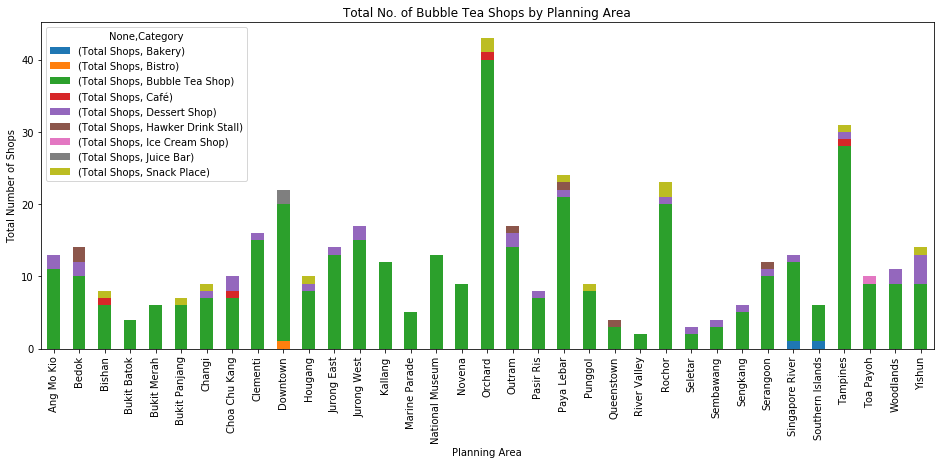

In [24]:
ShopTotal= ShopTotal.pivot_table(ShopTotal, index='Planning Area', columns='Category', aggfunc=sum, fill_value=0)

ShopTotal.groupby('Planning Area').sum().plot(kind ='bar', stacked=True,
          figsize=(16, 6),
          rot = 90)

plt.title('Total No. of Bubble Tea Shops by Planning Area')
plt.ylabel('Total Number of Shops')
plt.xlabel('Planning Area')

plt.show()

In [25]:
BrandTotal = bbtshops_df.groupby(['Shop Name'])['Planning Area'].count()
BrandTotal = BrandTotal.reset_index(name='Total Outlets')

# find the average no. of outlets a brand owns
BrandTotal.mean()

Total Outlets    3.698276
dtype: float64

In [26]:
# filter out main competitor brands that have more than 4 outlets across Singapore
BrandAvg =BrandTotal[BrandTotal['Total Outlets']>4]
BrandAvg= BrandAvg.sort_values('Total Outlets', ascending=False)
BrandAvg

,Shop Name,Total Outlets
42,LiHO,85
37,KOI Thé,52
28,Gong Cha 贡茶,22
62,R&B 巡茶,20
24,Each A Cup,17
50,Nine Fresh 九鲜,17
113,i.tea,13
34,I Love Taimei 我愛台妹,9
56,Partea茶派,9
79,Tea Tree Cafe,9


### 3.1 One hot encoding

Perform one hot encoding to analyze the shop categories and prepare the dataframe for clustering 

In [27]:
# one hot encoding
bbt_onehot = pd.get_dummies(bbtshops_df[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bbt_onehot['Planning Area'] = bbtshops_df['Planning Area'] 

# move neighborhood column to the first column
fixed_columns = [bbt_onehot.columns[-1]] + list(bbt_onehot.columns[:-1])

bbt_onehot = bbt_onehot[fixed_columns]

print(bbt_onehot.shape)
bbt_onehot.head()

(429, 10)


,Planning Area,Bakery,Bistro,Bubble Tea Shop,Café,Dessert Shop,Hawker Drink Stall,Ice Cream Shop,Juice Bar,Snack Place
0,Ang Mo Kio,0,0,1,0,0,0,0,0,0
1,Ang Mo Kio,0,0,1,0,0,0,0,0,0
2,Ang Mo Kio,0,0,1,0,0,0,0,0,0
3,Ang Mo Kio,0,0,1,0,0,0,0,0,0
4,Ang Mo Kio,0,0,1,0,0,0,0,0,0


Take the mean of the frequency of occurance for each category and group rows by Planning Areas.

We only want to keep the top 3 shop categories selling bubble tea since other categories have almost near 0 results.

In [28]:
bbt_onehot = bbt_onehot.drop(['Bakery','Bistro','Ice Cream Shop','Café','Juice Bar','Hawker Drink Stall'], axis=1)
bbt_grp = bbt_onehot.groupby('Planning Area').mean().reset_index()

print(bbt_grp.shape)
bbt_grp.head()

(35, 4)


,Planning Area,Bubble Tea Shop,Dessert Shop,Snack Place
0,Ang Mo Kio,0.846154,0.153846,0.000
1,Bedok,0.714286,0.142857,0.000
2,Bishan,0.750000,0.000000,0.125
3,Bukit Batok,1.000000,0.000000,0.000
4,Bukit Merah,1.000000,0.000000,0.000


### 3.2 Top 3 shop categories for each planning area

In [77]:
top_category = 3

for hood in bbt_grp['Planning Area']:
    print("----"+hood+"----")
    temp = bbt_grp[bbt_grp['Planning Area'] == hood].T.reset_index()
    temp.columns = ['category','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_category))
    print('\n')

----Ang Mo Kio----
          category  freq
0  Bubble Tea Shop  0.85
1     Dessert Shop  0.15
2      Snack Place  0.00


----Bedok----
          category  freq
0  Bubble Tea Shop  0.71
1     Dessert Shop  0.14
2      Snack Place  0.00


----Bishan----
          category  freq
0  Bubble Tea Shop  0.75
1      Snack Place  0.12
2     Dessert Shop  0.00


----Bukit Batok----
          category  freq
0  Bubble Tea Shop   1.0
1     Dessert Shop   0.0
2      Snack Place   0.0


----Bukit Merah----
          category  freq
0  Bubble Tea Shop   1.0
1     Dessert Shop   0.0
2      Snack Place   0.0


----Bukit Panjang----
          category  freq
0  Bubble Tea Shop  0.86
1      Snack Place  0.14
2     Dessert Shop  0.00


----Changi----
          category  freq
0  Bubble Tea Shop  0.78
1     Dessert Shop  0.11
2      Snack Place  0.11


----Choa Chu Kang----
          category  freq
0  Bubble Tea Shop   0.7
1     Dessert Shop   0.2
2      Snack Place   0.0


----Clementi----
          category  

In [78]:
# Create a function to sort shop categories in descending order
def return_most_common_category(row, top_category):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_category]


# create new df that displays the top 3 shop categories for each neighborhood
top_category = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Planning Area']
for ind in np.arange(top_category):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
bbt_grp_sorted = pd.DataFrame(columns=columns)
bbt_grp_sorted['Planning Area'] = bbt_grp['Planning Area']

for ind in np.arange(bbt_grp.shape[0]):
    bbt_grp_sorted.iloc[ind, 1:] = return_most_common_category(bbt_grp.iloc[ind, :], top_category)

bbt_grp_sorted.head() 

,Planning Area,1st Most Common Category,2nd Most Common Category,3rd Most Common Category
0,Ang Mo Kio,Bubble Tea Shop,Dessert Shop,Snack Place
1,Bedok,Bubble Tea Shop,Dessert Shop,Snack Place
2,Bishan,Bubble Tea Shop,Snack Place,Dessert Shop
3,Bukit Batok,Bubble Tea Shop,Snack Place,Dessert Shop
4,Bukit Merah,Bubble Tea Shop,Snack Place,Dessert Shop


### 4. K Means Clustering

Use K-Means algorithm to cluster the bubble tea shops. K-Means is an unsupervised learning algorithm that tries to find interesting patterns among the data and splits them into clusters based on its attributes.

In [79]:
# Remove planning area 
bbt_grp_clustering = bbt_grp.drop('Planning Area', axis = 1)
bbt_grp_clustering.head()

,Bubble Tea Shop,Dessert Shop,Snack Place
0,0.846154,0.153846,0.000
1,0.714286,0.142857,0.000
2,0.750000,0.000000,0.125
3,1.000000,0.000000,0.000
4,1.000000,0.000000,0.000


#### Create 5 bins for Very Low, Low, Medium, High, Very High and bin the population figures for each planning area. We want to include population figure into our clustering. 

In [80]:
pop = bbtshops_df.groupby(['Planning Area','Latitude','Longitude','Population'])['Shop Name'].count()
pop = pop.reset_index(name='Total Shops')
pop['Population']= pop['Population'].astype(int)
pop

,Planning Area,Latitude,Longitude,Population,Total Shops
0,Ang Mo Kio,1.369842,103.846609,163950,13
1,Bedok,1.323976,103.930216,279380,14
2,Bishan,1.351452,103.848250,88010,8
3,Bukit Batok,1.349057,103.749591,153740,4
4,Bukit Merah,1.282813,103.816743,151980,6
5,Bukit Panjang,1.377921,103.771866,139280,7
6,Changi,1.352516,103.987007,1830,9
7,Choa Chu Kang,1.389260,103.743728,190890,10
8,Clementi,1.314026,103.762410,92420,16
9,Downtown,1.279395,103.852992,2720,22


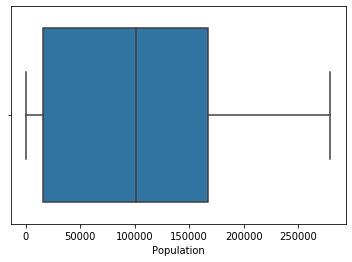

In [81]:
# boxplot to visualize outliers
sns.boxplot(x='Population', data=pop)

Text(0.5, 1.0, 'Population bins')

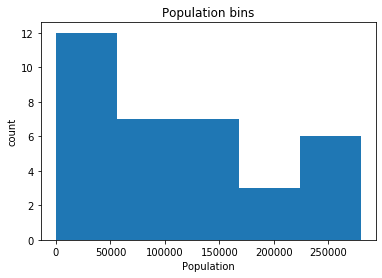

In [82]:
# histrogram to visualize the bins

plt.hist(pop['Population'],bins=5)
plt.xlabel("Population")
plt.ylabel("count")
plt.title("Population bins")

In [83]:
# create the bins and assign them to the planning areas
bin_names =['Very Low', 'Low', 'Medium', 'High', 'Very High']
popcat = pd.cut(pop['Population'], bins=[0,60000, 120000,180000, 240000,300000], labels=bin_names)
pop.insert(4,'Pop Categories', popcat)
pop.sort_values('Pop Categories')

,Planning Area,Latitude,Longitude,Population,Pop Categories,Total Shops
17,Orchard,1.305272,103.832876,8950,Very Low,43
18,Outram,1.282869,103.837860,18960,Very Low,17
23,River Valley,1.308398,103.886149,10250,Very Low,2
16,Novena,1.320617,103.843974,49210,Very Low,9
15,National Museum,1.296611,103.848500,450,Very Low,13
14,Marine Parade,1.302689,103.907395,46390,Very Low,5
24,Rochor,1.303266,103.852426,13340,Very Low,23
9,Downtown,1.279395,103.852992,2720,Very Low,22
25,Seletar,1.409849,103.877379,280,Very Low,3
6,Changi,1.352516,103.987007,1830,Very Low,9


#### Normalize the population data for preprocessing

In [84]:
from sklearn import preprocessing
# Normalize population column
pop_array = pop['Population'].values.reshape(1,-1)
normalized_pop = preprocessing.normalize(pop_array)
normalized_pop

array([[0.19375805, 0.3301746 , 0.10401126, 0.18169175, 0.17961177,
        0.16460276, 0.00216272, 0.22559607, 0.10922305, 0.00321453,
        0.26737311, 0.09364677, 0.31315651, 0.11997754, 0.05482425,
        0.00053182, 0.05815696, 0.01057722, 0.02240715, 0.17493179,
        0.13028294, 0.20156983, 0.11385575, 0.01211357, 0.01576537,
        0.00033091, 0.11335939, 0.28907118, 0.13745654, 0.00362816,
        0.00222181, 0.30340656, 0.1425856 , 0.30104293, 0.26037679]])

In [85]:
# Add normalized population figures back into dataframe
npop = pd.DataFrame(normalized_pop).transpose()
bbt_grp_clustering['Population']= npop
print(bbt_grp_clustering.shape)
bbt_grp_clustering

(35, 4)


,Bubble Tea Shop,Dessert Shop,Snack Place,Population
0,0.846154,0.153846,0.000000,0.193758
1,0.714286,0.142857,0.000000,0.330175
2,0.750000,0.000000,0.125000,0.104011
3,1.000000,0.000000,0.000000,0.181692
4,1.000000,0.000000,0.000000,0.179612
5,0.857143,0.000000,0.142857,0.164603
6,0.777778,0.111111,0.111111,0.002163
7,0.700000,0.200000,0.000000,0.225596
8,0.937500,0.062500,0.000000,0.109223
9,0.863636,0.000000,0.000000,0.003215


### 4.1 Finding the optimal no. of K 
#### Finding the optimal no. of K using elbow method

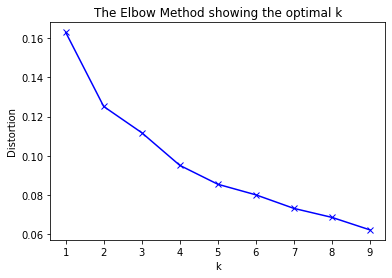

In [86]:
# Using elbow method
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state = 10).fit(bbt_grp_clustering)
    kmeanModel.fit(bbt_grp_clustering)
    distortions.append(sum(np.min(cdist(bbt_grp_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / bbt_grp_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


#### Finding the optimal no. of K using silhouette score

For n_clusters = 2, silhouette score is 0.3774048265046235)
For n_clusters = 3, silhouette score is 0.3465773085080757)
For n_clusters = 4, silhouette score is 0.31494458961490296)
For n_clusters = 5, silhouette score is 0.3092248077186269)
For n_clusters = 6, silhouette score is 0.315520279747832)
For n_clusters = 7, silhouette score is 0.30059539504655663)
For n_clusters = 8, silhouette score is 0.28380440355854575)
For n_clusters = 9, silhouette score is 0.29179004113225054)


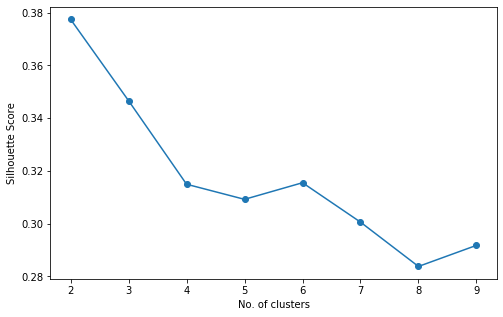

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores=[]

range_n_clusters= np.arange(2,10)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 10)
    preds = clusterer.fit_predict(bbt_grp_clustering)
    centers = clusterer.cluster_centers_

    score = silhouette_score(bbt_grp_clustering, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

    scores.append(score)

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(8,5))
    plt.plot(range_n_clusters, y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range_n_clusters)
    plt.show()

plot(range_n_clusters, scores, "No. of clusters", "Silhouette Score")

### 4.2 Performing K- Means Clustering

In [88]:
kclusters = 3

# Run k-means clustering
kmeans = KMeans(init = 'k-means++', n_clusters = kclusters, n_init= 10, random_state = 10).fit(bbt_grp_clustering)

In [89]:
# Add clustering labels
bbt_grp_sorted.insert(1, 'Cluster Labels', kmeans.labels_)
bbt_grp_sorted.head()

,Planning Area,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category
0,Ang Mo Kio,2,Bubble Tea Shop,Dessert Shop,Snack Place
1,Bedok,2,Bubble Tea Shop,Dessert Shop,Snack Place
2,Bishan,0,Bubble Tea Shop,Snack Place,Dessert Shop
3,Bukit Batok,0,Bubble Tea Shop,Snack Place,Dessert Shop
4,Bukit Merah,0,Bubble Tea Shop,Snack Place,Dessert Shop


#### Create a new dataframe with all the data merged together

In [90]:
bbt_shop_new = pop
bbt_shop_new = pd.merge(bbt_shop_new, bbt_grp_sorted, on='Planning Area')
bbt_shop_new

,Planning Area,Latitude,Longitude,Population,Pop Categories,Total Shops,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category
0,Ang Mo Kio,1.369842,103.846609,163950,Medium,13,2,Bubble Tea Shop,Dessert Shop,Snack Place
1,Bedok,1.323976,103.930216,279380,Very High,14,2,Bubble Tea Shop,Dessert Shop,Snack Place
2,Bishan,1.351452,103.848250,88010,Low,8,0,Bubble Tea Shop,Snack Place,Dessert Shop
3,Bukit Batok,1.349057,103.749591,153740,Medium,4,0,Bubble Tea Shop,Snack Place,Dessert Shop
4,Bukit Merah,1.282813,103.816743,151980,Medium,6,0,Bubble Tea Shop,Snack Place,Dessert Shop
5,Bukit Panjang,1.377921,103.771866,139280,Medium,7,0,Bubble Tea Shop,Snack Place,Dessert Shop
6,Changi,1.352516,103.987007,1830,Very Low,9,0,Bubble Tea Shop,Snack Place,Dessert Shop
7,Choa Chu Kang,1.389260,103.743728,190890,High,10,1,Bubble Tea Shop,Dessert Shop,Snack Place
8,Clementi,1.314026,103.762410,92420,Low,16,0,Bubble Tea Shop,Dessert Shop,Snack Place
9,Downtown,1.279395,103.852992,2720,Very Low,22,0,Bubble Tea Shop,Snack Place,Dessert Shop


### 5. Visualizing Clusters 

#### Plotting clusters on the map

In [91]:
SG_cmap = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, poi, cluster in zip(bbt_shop_new['Latitude'], bbt_shop_new['Longitude'], bbt_shop_new['Planning Area'],bbt_shop_new['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color=rainbow[cluster-1],
        fill=True,
        popup=label,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(SG_cmap)  
    
SG_cmap

### 5.1 Examining Clusters

Cluster 1 (red markers) can be interpreted as areas planning areas that have a higher density of bubble tea shops compared to other clusters. It can also be inferred that the planning areas under cluster 1 have high customer traffic flow, since there are a great number of shops operating in those areas. 

Cluster 2 (green markers) Planning area with low density of bubble tea shops medium size household population. Cluster 2 forms the far north planning areas of Singapore that have a mix of high and low number of residents living in the area. 

Cluster 3 (purple markers) Planning area with moderate density of bubble tea shops high household population. Cluster 3 forms the heartland areas in Singapore and has a high number of resident population compared to cluster 2. 

Refer to report for further analysis.

#### Cluster 1

In [95]:
bbt_shop_new.loc[bbt_shop_new['Cluster Labels'] == 0, bbt_shop_new.columns]

,Planning Area,Latitude,Longitude,Population,Pop Categories,Total Shops,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category
2,Bishan,1.351452,103.848250,88010,Low,8,0,Bubble Tea Shop,Snack Place,Dessert Shop
3,Bukit Batok,1.349057,103.749591,153740,Medium,4,0,Bubble Tea Shop,Snack Place,Dessert Shop
4,Bukit Merah,1.282813,103.816743,151980,Medium,6,0,Bubble Tea Shop,Snack Place,Dessert Shop
5,Bukit Panjang,1.377921,103.771866,139280,Medium,7,0,Bubble Tea Shop,Snack Place,Dessert Shop
6,Changi,1.352516,103.987007,1830,Very Low,9,0,Bubble Tea Shop,Snack Place,Dessert Shop
8,Clementi,1.314026,103.762410,92420,Low,16,0,Bubble Tea Shop,Dessert Shop,Snack Place
9,Downtown,1.279395,103.852992,2720,Very Low,22,0,Bubble Tea Shop,Snack Place,Dessert Shop
11,Jurong East,1.333115,103.742297,79240,Low,14,0,Bubble Tea Shop,Dessert Shop,Snack Place
13,Kallang,1.310759,103.866262,101520,Low,12,0,Bubble Tea Shop,Snack Place,Dessert Shop
14,Marine Parade,1.302689,103.907395,46390,Very Low,5,0,Bubble Tea Shop,Snack Place,Dessert Shop


#### Cluster 2

In [96]:
bbt_shop_new.loc[bbt_shop_new['Cluster Labels'] == 1, bbt_shop_new.columns]

,Planning Area,Latitude,Longitude,Population,Pop Categories,Total Shops,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category
7,Choa Chu Kang,1.389260,103.743728,190890,High,10,1,Bubble Tea Shop,Dessert Shop,Snack Place
25,Seletar,1.409849,103.877379,280,Very Low,3,1,Bubble Tea Shop,Dessert Shop,Snack Place
26,Sembawang,1.448065,103.820760,95920,Low,4,1,Bubble Tea Shop,Dessert Shop,Snack Place
34,Yishun,1.428136,103.833694,220320,High,14,1,Bubble Tea Shop,Dessert Shop,Snack Place


#### Cluster 3

In [97]:
bbt_shop_new.loc[bbt_shop_new['Cluster Labels'] == 2, bbt_shop_new.columns]

,Planning Area,Latitude,Longitude,Population,Pop Categories,Total Shops,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category
0,Ang Mo Kio,1.369842,103.846609,163950,Medium,13,2,Bubble Tea Shop,Dessert Shop,Snack Place
1,Bedok,1.323976,103.930216,279380,Very High,14,2,Bubble Tea Shop,Dessert Shop,Snack Place
10,Hougang,1.371904,103.892753,226240,High,10,2,Bubble Tea Shop,Snack Place,Dessert Shop
12,Jurong West,1.339636,103.707339,264980,Very High,17,2,Bubble Tea Shop,Dessert Shop,Snack Place
19,Pasir Ris,1.375980,103.954255,148020,Medium,8,2,Bubble Tea Shop,Dessert Shop,Snack Place
27,Sengkang,1.390949,103.895175,244600,Very High,6,2,Bubble Tea Shop,Dessert Shop,Snack Place
31,Tampines,1.354653,103.943571,256730,Very High,31,2,Bubble Tea Shop,Snack Place,Dessert Shop
33,Woodlands,1.436897,103.786216,254730,Very High,11,2,Bubble Tea Shop,Dessert Shop,Snack Place
